# Ca dynamics

## Equation for our internal Ca dynamics

$ influx  = -k \cdot \frac{I_{Ca}}{2Fd} $

$ pump    = -p \cdot \frac{k_t \cdot [Ca]_i}{[Ca]_i + K_d} $

$ decay = \frac{[Ca]_{i,inf} - [Ca]_i}{\tau_r} $

$ [Ca]_i = influx + pump + decay $


-  Wolf uses k and p to balance the in- and efflux of Ca and to give reasonable Ca sensitivity for the SK and BK channels. **Perhaps we should rebalance these, based on our model?**



In [2]:
import numpy                as np
import matplotlib.pyplot    as plt
import pandas               as pd
%matplotlib inline

from scipy.stats import linregress

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
plt.rcParams['savefig.dpi'] = 1200

pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return "%s" % self.to_latex()

pd.DataFrame._repr_latex_ = _repr_latex_  # monkey patch pandas DataFrame

import warnings; warnings.simplefilter('ignore')

## Parameters used in source

In [3]:
data = [[0.1, 10000, 0.02, '1e-4', 1e-4, 10, 43],
        [1.0, 0.1,  '-', '1e-4', 1e-4, '-', '-'],
        ['radius', '-', 'z*F', '8.5e-4*Asurf', 0.3e-3, 50, 'large?']]

df = pd.DataFrame(data, columns=['depth [um]', 'k', 'p', 'kt [mM/ms]', 'kd [mM]', '[Ca]inf [nM]', 'tau [ms]']).fillna("")
df.index = ['Wolf', 'Destexhe', 'JS']
df

depth [um]      k     p    kt [mM/ms]  kd [mM] [Ca]inf [nM] tau [ms]
Wolf            0.1  10000  0.02          1e-4   0.0001           10       43
Destexhe          1    0.1     -          1e-4   0.0001            -        -
JS           radius      -   z*F  8.5e-4*Asurf   0.0003           50   large?

## Concentration in Jedrzejewska-Szmek

-  Calc from flourecent or measured directly?

calculated from flouresent.

-  Size of storage?

They are using an average over shells covering the whole volume of the cylinder. The size of their soma is larger than ours, see illustration below.

The thickness of our buffer is half of the outer most shell (thinnest) used in Jedrzejewska-Szmek

<img src='Figures/illustration_Ca_Blackwell.png'>

The intracellular concentration in our models follows Wolf -> Destexhe et al., (1993). Ionic Mechanisms for Intrinsic Slow Oscillations in Thalamic Relay Neurons. Destexhe modelles the concentration in a thin shell beneath the membrane (depth 1 um). In our models the depth is set to 0.1 um. This gives a 10 fold increase (see below) of the concentration and increases the difference with Jedrzejewska-Szmek, Blackwell et al., (2017). According to Jedrzejewska-Szmek the concentration should be about 0.02 uM in soma following the same stimulation paradigm. This would correspond to a shell size of 50 um in our model...

## Measuring [Ca] in somatic shells (JS)
data created using the JS model under V-clamp (-50:0 mV). The legend shows shell number, with 1 beeing the outer most shell.

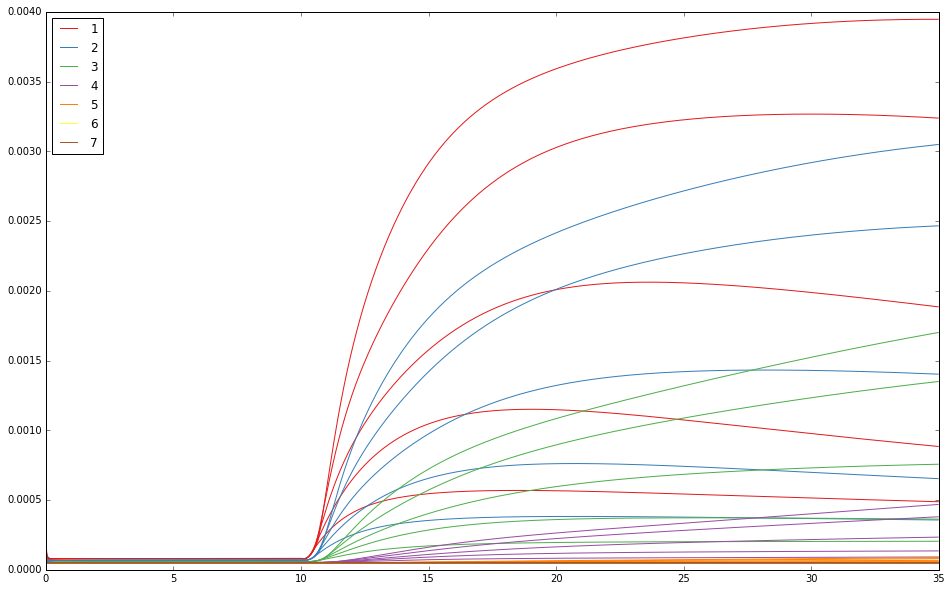

In [18]:
import glob

gradient = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628']
labels   = {}

plt.figure(figsize=(16,10))

for i in range(1,8):
    
    files    = glob.glob('Results/ComparingCa_JS/results_Ca_vClamp*difshell_'+str(i)+'.dat')
    
    
    for f in files:
        
        if not i in labels:
            labels[i]=1
            label       = str(i)
        else:
            label = ''
        
        x,y = np.loadtxt(f, unpack=True)
        plt.plot(x*1e3, y, color=gradient[i-1], label=label)
        
plt.legend(loc='best')
plt.show()

## What's the volume of the shells in JS (soma)?

Volume calculated as:

$ V_{shell}^{i} = \pi \cdot L \cdot (r_{outer}^2 - r_{inner}^2)  $

In [17]:
R = 11.3
L = 11.3
r = 11.3
d = 0.1
i = 1

flag = False

while d <= r:
    print 'Shell', i
    print '\t', 'Outer radius\t', r, '\n\tDepth\t\t', d, '\n\tVolume\t\t', np.pi*L*(r**2-(r-d)**2)
    r = r - d
    d = d * 2
    i = i + 1
    
    if d > r:
        if not flag:
            d = r
            flag = True
        else:
            break

Shell 1
	Outer radius	11.3 
	Depth		0.1 
	Volume		79.8749932175
Shell 2
	Outer radius	11.2 
	Depth		0.2 
	Volume		157.619986616
Shell 3
	Outer radius	11.0 
	Depth		0.4 
	Volume		306.719973955
Shell 4
	Outer radius	10.6 
	Depth		0.8 
	Volume		579.359950804
Shell 5
	Outer radius	9.8 
	Depth		1.6 
	Volume		1022.39991318
Shell 6
	Outer radius	8.2 
	Depth		3.2 
	Volume		1499.51987267
Shell 7
	Outer radius	5.0 
	Depth		5.0 
	Volume		887.499924639


** The volume of the shells get progressively larger the deeper we go. This is also true for thinner dendrites (at least with radius of 0.5 um). ** This means that averaging over shells give the largest influence of the relatively low concentration, interior shells. 

## Transforming volume size
Their total shell volume is over 3 times larger than ours, while the buffer difference is almost 100 times larger, see below.

$ A_{cyl} = 2\pi \cdot r \cdot h  = \pi \cdot d \cdot h $ 

$ V_{cyl} = \pi \cdot r^2 \cdot h = \frac{\pi \cdot d^2 \cdot h}{4} $ 


In [6]:
soma_vol_diff = 11.3**3 / (6.1**2*12.2)    # r2*h
buffer_diff   = 11.3**3 / (2*6.1*12.2*0.1)  # pi*r2*h; 2pi*r*h*deep
v_to_b_diff   = 6.1**2*12.2  / (2*6.1*12.2*0.1)  # r2*h; 2r*h*deep

print 'somatic size difference:\t', soma_vol_diff
print 'buffer difference:\t\t',     buffer_diff
print 'volume to buffer diff:\t\t', v_to_b_diff

somatic size difference:	3.17845326261
buffer difference:		96.9428245095
volume to buffer diff:		30.5


## Scaling the buffer size
The below figures are created using a similar protocole as in JS; three short duration, high amplitude current pulses causes the cell to fire with ISI 20 ms (50 Hz, topp two panels) and the Ca concentration is measured in the shell (L- and T-type have theire own pool, green). The small difference compared to JS: larger amp of I to cause AP; concentration is measured directly instead of averaged from flourecent signal in shells (absent).  

<img src='./Figures/CaConc_3AP.png'>

## Using our compartment volume as buffer size 

<img src='./Figures/CaConc_3AP_b2v.png'>

** If we use the whole compartment volume (of the soma) as shell we get a concentration that is about ten times larger than the one reported in JS (compare to their fig 2B at somatic distance 0; ~0.03 vs 0.4 $\mu$M ). Even with a shell depth set to give the same buffer size gives a larger value (lower panel of previous fig. "JS shell depth = 9.7")

## Other calcium models

### Doron and Segev 2017
TODO for this weeks networks meeting: check out Segev Ca models

The Ca concentratin model in Doron, Segev et al 2017 comes from Grunditz et al 2008 (both are named cadiffus.mod and are identical as checked by the diff command in a termial). The grunditz model in turn is based on the example diffusion model given in 

    The NEURON Book (NB)
    
This mechanism provides radial diffusion between concetrical shells and axial diffusion between compartments, but no buffering nor pumps. The mechanism is extended with pumps in NB, but this is not used in the two models above.

The entry for Doron et al 2017, also includes a mechanism that according to the comments include pumps (cad.mod). When checking this mechanism it is clear that this is similar to the mechanism used in our NEURON models (based on Destexhte 1993), with the pump part taken out. Further investigations show that this mechanism is not in use (grep -rn cad ./ from the root of the model--cad is the suffix of the mechanism). 

### Bar-Ilan, Gidon and Segev 2013

    The role of dendritic inhibition in shaping the plasticity of excitatory synapses
    
also claim to have ca diffusion and pumps but I could not find the model on modelDB.

### Fink et al 2000

    An image-based model of calcium waves in differentiated neuroblastoma cells

Has implemented a more detailed version of the Ca mechanims in NB, including IP3, SERCA, ER etec. 

### Ashhad and Narayanan 2013

    Quantitative interactions between the A-type K+ current and inositol trisphosphate receptors regulate intraneuronal Ca2+ waves and synaptic plasticity

Based on Fink et al., with minor updates, substrate IP3Ca added, some other removed. 

### Basak and Narayanan 2018

    Spatially dispersed synapses yield sharply-tuned place cell responses through dendritic spike initiation

Published recently (sept. 2018). Developed based on Ashhad and Narayanan 2013, including CamKII excluding IP3

## Calculating volume ratios for NB mech of diffusion

There seems to be a bug in the mechanism from Basak and Narayanan 2018. The volumes of the shells are only updated for the first substrate, all the following ones seems to be using the last value. ** Is this the inne or the outer volume? **
By looking at the equations it is not clear if volume rates are calculated outside in or inside out. 

<img src='./Figures/NB_fig9-9_shellIllustration.png'>

dr = 1/12

r  = 1/2

$ vrat[0] = \frac{\pi}{6} \cdot ( r - dr/2 ) = [\frac{\pi}{6} = k] = k \cdot (\frac{1}{2} - \frac{1}{2\cdot12})  $
$         =  k \cdot \frac{1}{2} \cdot \frac{23}{24} = [k \cdot \frac{1}{2} = k2] = k2 \cdot \frac{23}{24}$

r = r - 2*dr = $ \frac{1}{2} - \frac{1}{6} = \frac{1}{3} $

$ vrat[1]_i = k \cdot ( r + dr/2 ) = k \cdot (\frac{1}{3} + \frac{1}{2\cdot12})  $
$           = k \cdot (\frac{8}{24} + \frac{1}{24}) = k \cdot \frac{1}{2} \cdot \frac{3}{4} $

$ vrat[1]   = vrat[1]_i + k \cdot ( r - dr/2 ) 
            = vrat[1]_i + k \cdot (\frac{1}{3} - \frac{1}{2\cdot12}) 
            = k \cdot \frac{1}{2} \cdot (\frac{9}{12} + \frac{7}{12})  $
$           = k \cdot \frac{1}{2} \cdot \frac{4}{3} = k2 \cdot \frac{4}{3} $

r = r - 2*dr = $ \frac{1}{3} - \frac{1}{6} = \frac{1}{6} $

$ vrat[2]_i = k \cdot ( r + dr/2 ) = k \cdot (\frac{1}{6} + \frac{1}{2\cdot12})  $
$           = k \cdot (\frac{4}{24} + \frac{1}{24}) = k \cdot \frac{1}{2} \cdot \frac{5}{12} $

$ vrat[2]   = vrat[2]_i + k \cdot ( r - dr/2 ) = vrat[2]_i + k \cdot (\frac{1}{6} - \frac{1}{2\cdot12})    $
$           = k \cdot \frac{1}{2} \cdot (\frac{5}{12} + \frac{3}{12}) = k2 \cdot \frac{2}{3} $

r = r - 2*dr = $ \frac{1}{6} - \frac{1}{6} = 0 $

$ vrat[3]   = k \cdot ( r + dr/2 ) = k \cdot (0 + \frac{1}{2\cdot12})  $
$           = k2 \cdot \frac{1}{12} $


** vrat[1] > vrat[0] > vrat[2] > vrat[3]  **

$ \therefore $ ratios are calculated outside -> in, and most of the rates are multiplied onto the smallest volume.

## The calcium model in JS gives smaller values than source experiments (<font color='red'>red</font> text)

Ca values are taken from Shindou 2011 (fig B as well). Values given in text close to fig 2 in source

<img src='./Figures/JS_validation.png'>

## Updating cadyn.mod and caldyn.mod
* cainf: changed from 10 to 70 nM   (Sabatini et al., 2002)
* drive_pump: check added to only pump when cai larger than cainf
* depth updated from 0.1 to 0.2 um. This about halves the concentration, but also slightly affects the tail current (R-type and synaptic) as well as voltage. Probable cause: less conc - higer driving force of Ica - higer Ica current - higher depol Vm - less Mg block - more synaptic current.
## Adding ca current from synapse to LT-pool
* 10 and 0.5% ca of total current for nmda and ampa, respectively
* stimulating one synapse in distal dendrites 20 times (*in vitro*) give [Ca] of 300 uM, can be compared with the 150 uM reported in Dorman et al Blackwell 2018 (but they use single stimuli per spine. Axial resistance is 125 except for spine neck with 1130 ohm*cm
* found bug in tmglut: NMDA contribution to Ca current not calculated. Only ampa is contributing, hence the low value.
* Ask Alex how the valence of Ca (2) affects current calculations (should the extracted current be reduced by 2?)